<div id="custom-header" style="padding: 15px; color: white; margin: 0; font-size: 28px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 15px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b> Attrition Alchemy👨‍💼:- Data-Driven Insights 📊 and Predictive Strategies 🪄 for Employee Retention </b>
</div>


<div style="border-radius:10px;border:black solid;padding: 15px;background-color:white;font-size:110%;text-align:left">

<h3 align="left"><font color=#6D214F>📝 Aim:</font></h3>   
 
    
- To perform data preprocessing on five separate files and make it as a single file.
- The preprocessing involved handling missing values, addressing duplicates, and ensuring consistency across the datasets.
- Subsequently, to merge these datasets based on common identifiers to create a new CSV file, consolidating the preprocessed content for comprehensive analysis.
    


<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Importing Libraries </b>
</div>

In [1]:
#Import necessary libraries
import pandas as pd  #pandas for data manipulation and analysis
import numpy as np   #numpy for numerical operations
from pprint import PrettyPrinter  #pprint for pretty printing of data structures
from datetime import datetime, time  #datetime for working with dates and times
import matplotlib.pyplot as plt  #matplotlib for basic data visualization
import seaborn as sns  #seaborn for statistical data visualization
import plotly.express as px  #plotly express for interactive and expressive visualizations

In [2]:
#Set the maximum number of displayed columns for Pandas DataFrames to 'None' (display all columns)
pd.set_option('display.max_columns', None)
#Set the maximum number of displayed rows for Pandas DataFrames to 30
pd.set_option('display.max_rows', 30)

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Loading Datasets </b>
</div>

In [3]:
#Read the data dictionary from an Excel file into a DataFrame
df_dict = pd.read_excel(r"C:\Users\ksund\Music\machine_learnin_files\Guvi_Batch5\Guvi_Batch5\Final Project\data_dictionary.xlsx")
#Read the employee survey data from a CSV file into a DataFrame
df_emp_survey = pd.read_csv(r"C:\Users\ksund\Music\machine_learnin_files\Guvi_Batch5\Guvi_Batch5\Final Project\employee_survey_data.csv")
#Read the in-time data from a CSV file into a DataFrame
df_in_time = pd.read_csv(r"C:\Users\ksund\Music\machine_learnin_files\Guvi_Batch5\Guvi_Batch5\Final Project\in_time.csv")
#Read the out-time data from a CSV file into a DataFrame
df_out_time = pd.read_csv(r"C:\Users\ksund\Music\machine_learnin_files\Guvi_Batch5\Guvi_Batch5\Final Project\out_time.csv")
#Read the general employee data from a CSV file into a DataFrame
df_general = pd.read_csv(r"C:\Users\ksund\Music\machine_learnin_files\Guvi_Batch5\Guvi_Batch5\Final Project\general_data.csv")
#Read the manager survey data from a CSV file into a DataFrame
df_manager_survey = pd.read_csv(r"C:\Users\ksund\Music\machine_learnin_files\Guvi_Batch5\Guvi_Batch5\Final Project\manager_survey_data.csv")

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Data Wrangling </b>
</div>

In [4]:
#Rename the 'Unnamed: 0' column to 'EmployeeID' in the df_in_time DataFrame
df_in_time.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)
#Rename the 'Unnamed: 0' column to 'EmployeeID' in the df_out_time DataFrame
df_out_time.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)

In [5]:
threshold = 0.8
#Calculate null percentages for each column
null_percentages_in = df_in_time.isnull().mean()
null_percentages_out = df_out_time.isnull().mean()
#Filter columns where null percentage is above the threshold
columns_above_threshold_in = null_percentages_in[null_percentages_in >= threshold].index
columns_above_threshold_out = null_percentages_out[null_percentages_out >= threshold].index
#Print the sum of null values for columns above the threshold
print(df_in_time[columns_above_threshold_in].isnull().sum())
print(df_out_time[columns_above_threshold_out].isnull().sum())

2015-01-01    4410
2015-01-14    4410
2015-01-26    4410
2015-03-05    4410
2015-05-01    4410
2015-07-17    4410
2015-09-17    4410
2015-10-02    4410
2015-11-09    4410
2015-11-10    4410
2015-11-11    4410
2015-12-25    4410
dtype: int64
2015-01-01    4410
2015-01-14    4410
2015-01-26    4410
2015-03-05    4410
2015-05-01    4410
2015-07-17    4410
2015-09-17    4410
2015-10-02    4410
2015-11-09    4410
2015-11-10    4410
2015-11-11    4410
2015-12-25    4410
dtype: int64


## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Approach-1 :Finding Over-Time-Worked</div> 

In [6]:
#Identify columns with float data type in the df_out_time DataFrame
drop_col = list(df_out_time.select_dtypes(include='float').columns)#Null values are in float datatypes here holidays columns
#Add 'EmployeeID' column to the list of columns to be dropped
drop_col.append('EmployeeID')
#Get the list of columns from df_in_time after excluding columns identified for dropping
columns_list = list(df_in_time.drop(columns=drop_col).columns)

In [7]:
def avg_working_time(df_in,df_out,columns_list):
    """
    calculate avg_working_time based on in-time and out-time dataframes.

    Parameters:
    - df_in:In-Time-DataFrame
        The in-time DataFrame containing dates column.
    - df_out:out-Time-DataFrame
        The out-time DataFrame containing dates column.
    - columns_list:list of columns in dataframe
        The columns name which are used to find average working time.
    Returns:
    - result_df: series/columns
        The calculated 'Avg_Working_time' column.
    """
    #Create a list to store each calculated column
    calculated_columns = []
    for i in columns_list:
        in_date = pd.to_datetime(df_in[i])
        out_date = pd.to_datetime(df_out[i])
    
        #Calculate the time difference and store it in the list
        calculated_columns.append(out_date - in_date)
    
    # Concatenate the list of columns to the result_df
    result_df = pd.concat(calculated_columns, axis=1, keys=columns_list)
    result_df['Avg_Working_time']=result_df[columns_list].mean(axis=1)
    return result_df['Avg_Working_time']


def add_overtime_column(df):
    """
    Adds 'Over_time_Worked' column to the DataFrame based on the 'Avg_Working_time' column.

    Parameters:
    - df: DataFrame
        The input DataFrame containing 'Avg_Working_time' column.

    Returns:
    - df: DataFrame
        The input DataFrame with the added 'Over_time_Worked' column.
    """
    #Convert the 'Avg_Working_time' column to a Timedelta type
    df['Avg_Working_time'] = pd.to_timedelta(df['Avg_Working_time'])
    #Calculate the threshold for overtime (8 hours)
    overtime_threshold = pd.Timedelta('8 hours')
    #Create the 'Over_time_Worked' column based on the condition
    df['Over_time_Worked'] = df['Avg_Working_time'] > overtime_threshold
    #Convert boolean values to 'Yes' and 'No'
    df['Over_time_Worked'] = df['Over_time_Worked'].map({True: 'Yes', False: 'No'})
    
    return df   

In [8]:
#Create a DataFrame 'df_in_out' with selected columns from 'df_manager_survey'
df_in_out = df_manager_survey[['EmployeeID', 'JobInvolvement', 'PerformanceRating']]
#Add 'Attrition', 'Avg_Working_time', and other calculated columns to 'df_in_out'
df_in_out['Attrition'] = df_general['Attrition']
df_in_out['Avg_Working_time'] = avg_working_time(df_in_time, df_out_time, columns_list)
df_in_out = add_overtime_column(df_in_out)
#Merge 'df_in_out' with 'df_emp_survey' on 'EmployeeID'
df_in_out = pd.merge(df_in_out, df_emp_survey, on='EmployeeID', how='left')
#Create a copy of 'df_in_out' as 'df_final' and drop the 'Attrition' column
df_final = df_in_out.copy()
df_final.drop(columns='Attrition', inplace=True)
#Display the 'df_in_out' DataFrame
df_in_out

,EmployeeID,JobInvolvement,PerformanceRating,Attrition,Avg_Working_time,Over_time_Worked,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3,3,No,0 days 07:22:25.142241379,No,3.0,4.0,2.0
1,2,2,4,Yes,0 days 07:43:08.288135593,No,3.0,2.0,4.0
2,3,3,3,No,0 days 07:00:47.665289256,No,2.0,2.0,1.0
3,4,2,3,No,0 days 07:11:37.242553191,No,4.0,4.0,3.0
4,5,3,3,No,0 days 08:00:22.228571428,Yes,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
4405,4406,3,3,No,0 days 08:31:20.197530864,Yes,4.0,1.0,3.0
4406,4407,2,3,No,0 days 06:05:34.634854771,No,4.0,4.0,3.0
4407,4408,3,4,No,0 days 07:42:23.874458874,No,1.0,3.0,3.0
4408,4409,2,3,No,0 days 09:29:33.340248962,Yes,4.0,1.0,3.0


### Attrition by OverTime

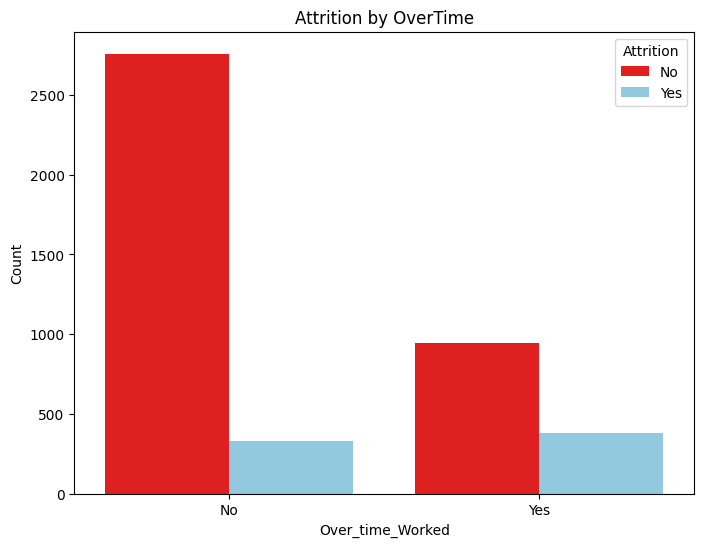

In [9]:
plt.figure(figsize=(8, 6))
#Create a countplot using Seaborn
sns.countplot(data=df_in_out, x='Over_time_Worked', hue='Attrition', palette=['red', '#87CEEB'])
#Set labels and title
plt.xlabel('Over_time_Worked')
plt.ylabel('Count')
plt.title('Attrition by OverTime')
#Show the plot
plt.show()

### correlation_matrix

In [10]:
#Map 'Yes' to 1 and 'No' to 0 in the 'Attrition' column
df_in_out['Attrition'] = df_in_out['Attrition'].map({'Yes': 1, 'No': 0})
#Map 'Yes' to 1 and 'No' to 0 in the 'Over_time_Worked' column
df_in_out['Over_time_Worked'] = df_in_out['Over_time_Worked'].map({'Yes': 1, 'No': 0})
#Calculate the correlation matrix for the DataFrame
correlation_matrix1 = df_in_out.corr()

### Display Heat map

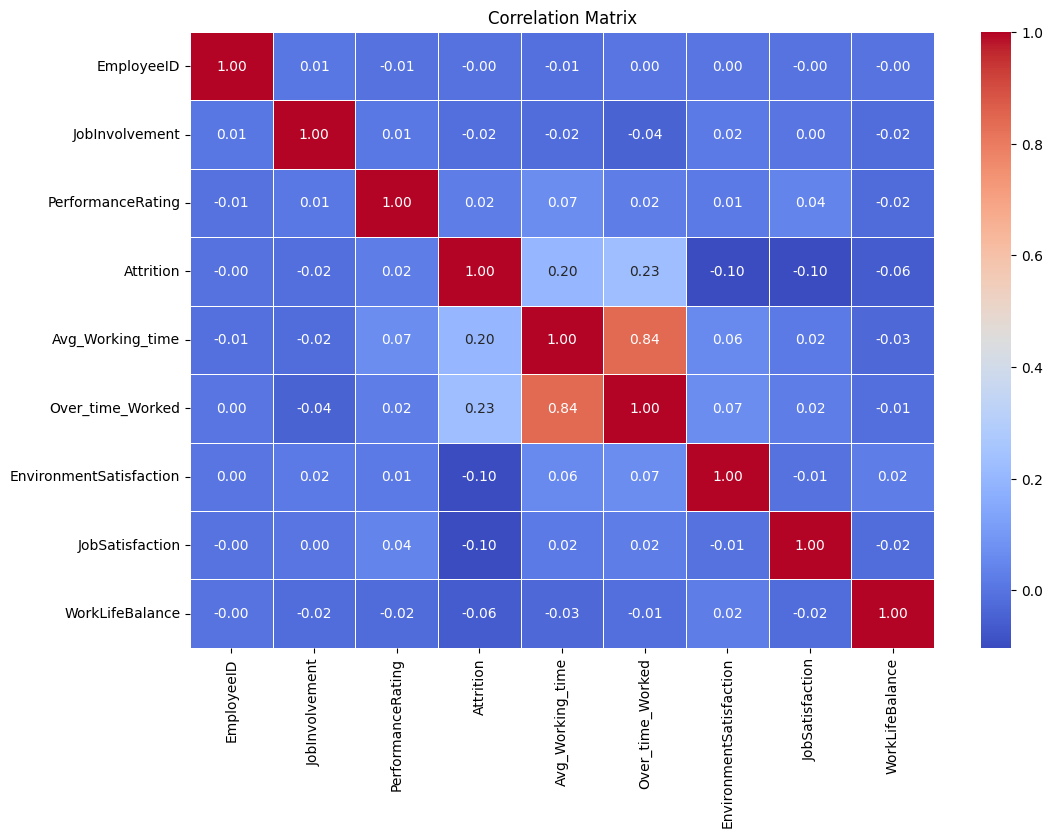

In [11]:
#Set up the figure size
plt.figure(figsize=(12, 8))
#Create a heatmap using Seaborn with annotations, coolwarm colormap, and specified formatting
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
#Set the title of the plot
plt.title("Correlation Matrix")
#Show the plot
plt.show()

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Approach-2 :Finding Avg Late-In/Early-In & Early-Out/Late-Out</div> 

In [12]:
#Identify columns with float data type in the df_out_time DataFrame (assumed to contain null values)
drop_col = list(df_out_time.select_dtypes(include='float').columns)
#Print the list of columns to be dropped
print(drop_col)
#Drop the identified columns from df_in_time
df_in_time.drop(columns=drop_col, inplace=True)
#Drop the identified columns from df_out_time
df_out_time.drop(columns=drop_col, inplace=True)

['2015-01-01', '2015-01-14', '2015-01-26', '2015-03-05', '2015-05-01', '2015-07-17', '2015-09-17', '2015-10-02', '2015-11-09', '2015-11-10', '2015-11-11', '2015-12-25']


In [13]:
#Create new DataFrames 'df_in_new' and 'df_out_new' as copies of 'df_in_time' and 'df_out_time'
df_in_new = df_in_time.copy()
df_out_new = df_out_time.copy()
#Rename the 'Unnamed: 0' column to 'EmployeeID' in the 'df_in_new' DataFrame
df_in_new.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)
#Rename the 'Unnamed: 0' column to 'EmployeeID' in the 'df_out_new' DataFrame
df_out_new.rename(columns={'Unnamed: 0': 'EmployeeID'}, inplace=True)

In [14]:
def in_time_difference_minutes(datetime_str):
    """
    Calculates Time Differences(fixed time 09:40:00) of time in minutes
    Parameters:
    - datetime_str: Datetime string
        The input datetime string values
    Returns:
    - value:calculated value
    """
    try:
        #Define the time thresholds
        start_time = datetime.strptime('09:40:00', '%H:%M:%S').time()
        end_time = datetime.strptime('10:10:00', '%H:%M:%S').time()
        #Parse the input datetime string
        input_datetime = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')
        #Extract the time component from the input datetime
        input_time = input_datetime.time()
        #Create datetime objects for the start and end times with the input date
        start_datetime = datetime.combine(input_datetime.date(), start_time)
        end_datetime = datetime.combine(input_datetime.date(), end_time)
        #Check if the input time is within the specified range
        if start_datetime <= input_datetime <= end_datetime:
            return 0
        elif input_time < start_time:
            #Calculate the time difference if input_time is before start_time
            delta = start_datetime - input_datetime
            return int(delta.total_seconds() / 60)  # Time difference in minutes
        else:
            #Calculate the time difference if input_time is after end_time
            delta = input_datetime - end_datetime
            return -int(delta.total_seconds() / 60)  # Time difference in minutes
    except Exception:
        return 0

def out_time_difference_minutes(datetime_str):
    """
    Calculates Time Differences(fixed time 17:40:00) of time in minutes
    Parameters:
    - datetime_str: Datetime string
        The input datetime string values
    Returns:
    - value:calculated value
    """
    try:
        #Define the time thresholds
        start_time = datetime.strptime('17:40:00', '%H:%M:%S').time()
        end_time = datetime.strptime('18:20:00', '%H:%M:%S').time()
        #Parse the input datetime string
        input_datetime = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')
        #Extract the time component from the input datetime
        input_time = input_datetime.time()
        #Create datetime objects for the start and end times with the input date
        start_datetime = datetime.combine(input_datetime.date(), start_time)
        end_datetime = datetime.combine(input_datetime.date(), end_time)
        #Check if the input time is within the specified range
        if start_datetime <= input_datetime <= end_datetime:
            return 0
        elif input_time < start_time:
            #Calculate the time difference if input_time is before start_time
            delta = start_datetime - input_datetime
            return -int(delta.total_seconds() / 60)  # Time difference in minutes
        else:
            #Calculate the time difference if input_time is after end_time
            delta = input_datetime - end_datetime
            return int(delta.total_seconds() / 60)  # Time difference in minutes
    except Exception:
        return 0
def extracted_df(df_in_new,in_time_difference_minutes):
    """
    Extract average in-time / out time for each month
    Parameters:
    - df_in_new: Dateframe 
        The input dataframe needed to be processed
    - in_time_difference_minutes:Values of time differences
    Returns:
    - df_in_new:Extracted Dataframe
    """
    #Iterate through months and perform operations
    for month in range(1, 13):
        month_str = f'2015-{month:02d}'
        #Select columns for the current month
        columns_to_apply = [col for col in df_in_new.columns if month_str in col and col != 'EmployeeID']
        #Apply the time_difference function to the selected columns
        df_in_new[columns_to_apply] = df_in_new[columns_to_apply].applymap(in_time_difference_minutes)
        #Calculate the monthly total and add a new 'monthly_total' column
        df_in_new[f'{month_str}_monthly_avg'] = df_in_new[columns_to_apply].mean(axis=1).round()
        #Remove the previous columns for the current month
        df_in_new.drop(columns=columns_to_apply, inplace=True)
    return df_in_new

In [15]:
%%time
#Apply the 'extracted_df' function to df_in_new and df_out_new using respective time difference functions
df_in_new = extracted_df(df_in_new, in_time_difference_minutes)
df_out_new = extracted_df(df_out_new, out_time_difference_minutes)
#Calculate the yearly average for in-time and out-time and add new columns 'Year_avg_in' and 'Year_avg_out'
df_in_new['Year_avg_in'] = df_in_new.drop(columns='EmployeeID').mean(axis=1).round()
df_out_new['Year_avg_out'] = df_out_new.drop(columns='EmployeeID').mean(axis=1).round()

CPU times: total: 1min 50s
Wall time: 2min 58s


In [16]:
#Merge 'df_in_new' and 'df_out_new' on 'EmployeeID' to create 'df_time' DataFrame
df_time = pd.merge(df_in_new[['EmployeeID', 'Year_avg_in']], df_out_new[['EmployeeID', 'Year_avg_out']], on='EmployeeID', how='left')
#Merge 'df_time' with 'df_general' on 'EmployeeID'
df_time = pd.merge(df_time, df_general[['EmployeeID', 'Attrition']], on='EmployeeID', how='left')
#Merge 'df_time' with 'df_manager_survey' on 'EmployeeID'
df_time = pd.merge(df_time, df_manager_survey, on='EmployeeID', how='left')
#Merge 'df_time' with 'df_emp_survey' on 'EmployeeID'
df_time = pd.merge(df_time, df_emp_survey, on='EmployeeID', how='left')
#Map categorical values 'Yes' and 'No' to numerical values 1 and 0 in the 'Attrition' column
df_time['Attrition'] = df_time['Attrition'].map({'Yes': 1, 'No': 0})
df_time

,EmployeeID,Year_avg_in,Year_avg_out,Attrition,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,-2.0,-19.0,0,3,3,3.0,4.0,2.0
1,2,-2.0,-8.0,1,2,4,3.0,2.0,4.0
2,3,-2.0,-37.0,0,3,3,2.0,2.0,1.0
3,4,-1.0,-29.0,0,2,3,4.0,4.0,3.0
4,5,-2.0,1.0,0,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
4405,4406,-3.0,17.0,0,3,3,4.0,1.0,3.0
4406,4407,-2.0,-90.0,0,2,3,4.0,4.0,3.0
4407,4408,-1.0,-9.0,0,3,4,1.0,3.0,3.0
4408,4409,-2.0,68.0,0,2,3,4.0,1.0,3.0


### correlation_matrix

In [17]:
#Calculate the correlation matrix for the DataFrame 'df_time'
correlation_matrix2 = df_time.corr()
correlation_matrix2

,EmployeeID,Year_avg_in,Year_avg_out,Attrition,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
EmployeeID,1.000000,0.001307,-0.012453,-0.004729,0.008591,-0.006892,0.000798,-0.001053,-0.001723
Year_avg_in,0.001307,1.000000,-0.020181,0.010007,-0.003040,-0.007798,-0.008084,-0.014836,-0.015840
Year_avg_out,-0.012453,-0.020181,1.000000,0.190251,-0.017040,0.071592,0.056805,0.014088,-0.033825
Attrition,-0.004729,0.010007,0.190251,1.000000,-0.015588,0.023403,-0.102142,-0.102847,-0.062756
JobInvolvement,0.008591,-0.003040,-0.017040,-0.015588,1.000000,0.010699,0.015416,0.004058,-0.019424
PerformanceRating,-0.006892,-0.007798,0.071592,0.023403,0.010699,1.000000,0.014057,0.043261,-0.023067
EnvironmentSatisfaction,0.000798,-0.008084,0.056805,-0.102142,0.015416,0.014057,1.000000,-0.006550,0.024379
JobSatisfaction,-0.001053,-0.014836,0.014088,-0.102847,0.004058,0.043261,-0.006550,1.000000,-0.019104
WorkLifeBalance,-0.001723,-0.015840,-0.033825,-0.062756,-0.019424,-0.023067,0.024379,-0.019104,1.000000


### Plotting the heatmap

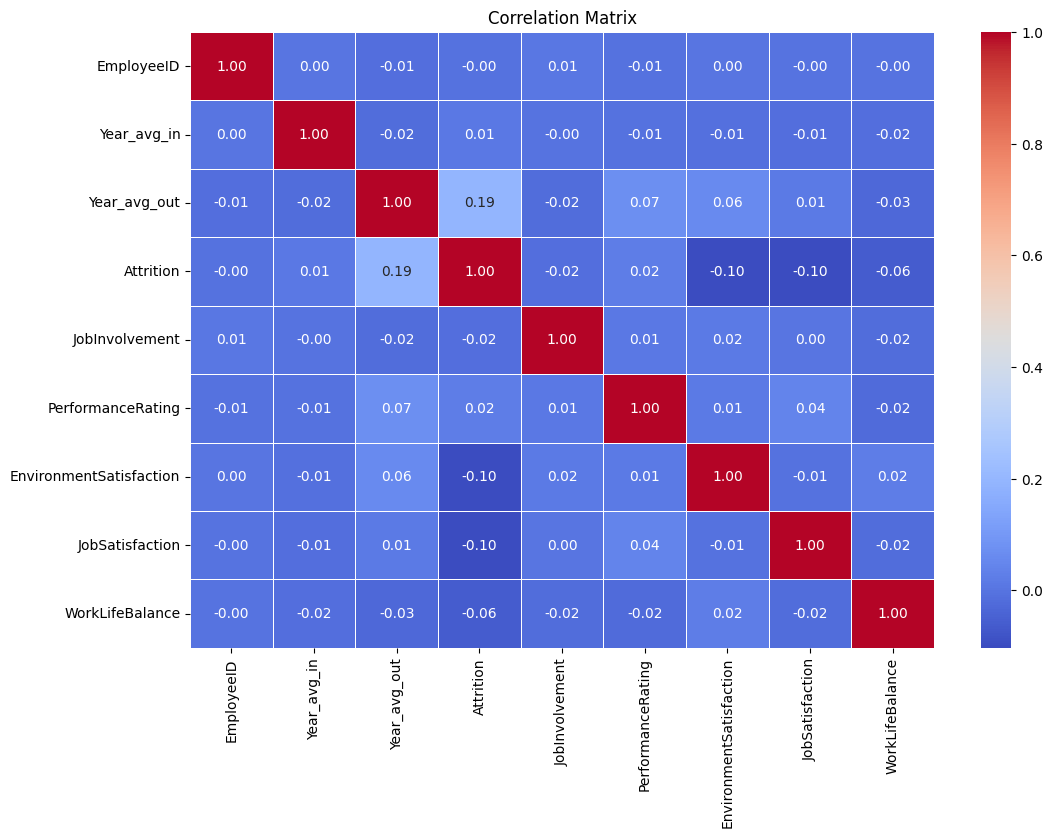

In [18]:
#Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [19]:
#Merge 'df_final' with 'df_general' on 'EmployeeID' using a left join
df_final = pd.merge(df_final, df_general, on='EmployeeID', how='left')
df_final

,EmployeeID,JobInvolvement,PerformanceRating,Avg_Working_time,Over_time_Worked,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,0 days 07:22:25.142241379,No,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,0 days 07:43:08.288135593,No,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,0 days 07:00:47.665289256,No,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,0 days 07:11:37.242553191,No,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,0 days 08:00:22.228571428,Yes,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,3,3,0 days 08:31:20.197530864,Yes,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,4407,2,3,0 days 06:05:34.634854771,No,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,4408,3,4,0 days 07:42:23.874458874,No,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,4409,2,3,0 days 09:29:33.340248962,Yes,4.0,1.0,3.0,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8


In [20]:
#Calculate the count of null values in each column
null_counts = df_final.isnull().sum()
#Select columns with non-zero null counts (columns containing null values)
columns_with_null = null_counts[null_counts > 0]
columns_with_null

EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
NumCompaniesWorked         19
TotalWorkingYears           9
dtype: int64

In [21]:
#Select rows where 'TotalWorkingYears' column has null values
null_values = df_final[df_final['TotalWorkingYears'].isnull()]
null_values

,EmployeeID,JobInvolvement,PerformanceRating,Avg_Working_time,Over_time_Worked,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
23,24,1,3,0 days 06:48:25.219008264,No,2.0,3.0,3.0,42,No,Travel_Rarely,Research & Development,4,4,Life Sciences,1,Male,1,Manufacturing Director,Married,89260,1.0,Y,14,8,0,NaN,4,20,11,6
137,138,2,3,0 days 07:40:29.299559471,No,4.0,4.0,3.0,43,No,Travel_Frequently,Sales,14,3,Life Sciences,1,Female,1,Manufacturing Director,Married,37480,7.0,Y,14,8,2,NaN,3,3,1,2
308,309,3,3,0 days 10:00:30.060344827,Yes,2.0,3.0,3.0,47,Yes,Travel_Frequently,Research & Development,4,3,Life Sciences,1,Male,1,Research Director,Single,27740,4.0,Y,13,8,1,NaN,2,5,1,3
574,575,3,3,0 days 08:00:07.311475409,Yes,3.0,4.0,3.0,37,No,Travel_Rarely,Research & Development,23,3,Life Sciences,1,Male,3,Manufacturing Director,Divorced,166590,7.0,Y,16,8,1,NaN,2,6,1,3
1517,1518,3,4,0 days 07:49:03.406926406,No,2.0,2.0,3.0,36,No,Non-Travel,Research & Development,5,4,Life Sciences,1,Male,1,Sales Executive,Married,85780,7.0,Y,21,8,0,NaN,4,9,0,8
2367,2368,3,3,0 days 06:53:40.283185840,No,3.0,3.0,3.0,39,No,Travel_Rarely,Sales,2,4,Life Sciences,1,Male,1,Laboratory Technician,Divorced,72640,0.0,Y,17,8,0,NaN,5,10,0,7
3120,3121,1,4,0 days 08:53:47.835443037,Yes,4.0,3.0,3.0,35,No,Travel_Rarely,Research & Development,12,2,Medical,1,Female,2,Sales Representative,Married,28090,4.0,Y,23,8,1,NaN,2,8,0,0
3818,3819,3,3,0 days 08:24:54.398305084,Yes,3.0,2.0,3.0,28,Yes,Travel_Rarely,Human Resources,1,3,Medical,1,Female,2,Laboratory Technician,Married,24130,1.0,Y,16,8,1,NaN,2,1,0,0
4409,4410,4,3,0 days 06:59:20.211206896,No,1.0,3.0,NaN,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,Male,2,Laboratory Technician,Divorced,54680,0.0,Y,12,8,0,NaN,6,21,3,9


In [22]:
#Fill missing values in 'NumCompaniesWorked' with 0
df_final['NumCompaniesWorked'].fillna(0, inplace=True)
#Fill missing values in 'TotalWorkingYears' with the corresponding values from 'YearsAtCompany'
df_final['TotalWorkingYears'].fillna(df_final['YearsAtCompany'], inplace=True)
#Fill missing values in 'EnvironmentSatisfaction' with the mode (most frequent value)
mode_environment_satisfaction = df_final['EnvironmentSatisfaction'].mode().iloc[0]
df_final['EnvironmentSatisfaction'].fillna(mode_environment_satisfaction, inplace=True)
#Fill missing values in 'WorkLifeBalance' with the mean value rounded
mean_work_life_balance = df_final['WorkLifeBalance'].mean().round()
df_final['WorkLifeBalance'].fillna(mean_work_life_balance, inplace=True)
#Fill missing values in 'JobSatisfaction' with the mode (most frequent value)
mode_job_satisfaction = df_final['JobSatisfaction'].mode().iloc[0]
df_final['JobSatisfaction'].fillna(mode_job_satisfaction, inplace=True)
#Display the DataFrame after filling missing values
df_final

,EmployeeID,JobInvolvement,PerformanceRating,Avg_Working_time,Over_time_Worked,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,0 days 07:22:25.142241379,No,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,0 days 07:43:08.288135593,No,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,0 days 07:00:47.665289256,No,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,0 days 07:11:37.242553191,No,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,0 days 08:00:22.228571428,Yes,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,3,3,0 days 08:31:20.197530864,Yes,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,4407,2,3,0 days 06:05:34.634854771,No,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,4408,3,4,0 days 07:42:23.874458874,No,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,4409,2,3,0 days 09:29:33.340248962,Yes,4.0,1.0,3.0,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8


In [23]:
#Calculate the count of null values in each column after filling missing values
null_counts = df_final.isnull().sum()
#Select columns with non-zero null counts (columns containing null values)
columns_with_null = null_counts[null_counts > 0]
columns_with_null

Series([], dtype: int64)

In [24]:
#check for duplicated values in dataframe
df_final.duplicated().sum() 

0

### Export Csv

In [25]:
#Export the DataFrame 'df_final' to a CSV file named 'Combined_attrition_data' without including the index
df_final.to_csv('Combined_attrition_data', index=False)